In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import pandas as pd
df = pd.read_csv (r'/home/yupaporn/codes/result_model/ResultEffNet_15AB_Testset_1FC_3_.csv')
print(df .shape)

(1312, 26)


In [3]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,...,width,height,Rleft,Rtop,Rwidth,Rheight,filename,category,Prob,15AB_ProbAll
0,0,111,111,40,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,477.0,311.0,0.092664,0.148873,0.513514,0.346614,AB01 P1 C040.JPG,Normal,0.958334,"[0.012282682, 0.02938291, 1.206438e-09, 5.2822..."
1,1,112,112,40,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,532.0,385.0,0.171698,0.154849,0.560377,0.428287,AB01 P2 C040.JPG,AB01,0.999923,"[0.9999229, 1.9924611e-05, 1.9037803e-12, 6.71..."
2,2,113,113,40,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,605.0,640.0,0.140316,0.150865,0.667984,0.711155,AB01 P4-1 C040.JPG,AB02,0.932384,"[0.06761548, 0.93238425, 4.7395063e-13, 1.2385..."


In [4]:
df.shape

(1312, 26)

In [5]:
 df['Sub_class']

0         AB01
1         AB01
2         AB01
3         AB01
4         AB01
         ...  
1307    Normal
1308    Normal
1309    Normal
1310    Normal
1311    Normal
Name: Sub_class, Length: 1312, dtype: object

In [6]:
p1 = df
act= p1['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
pred = p1['category'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       857
           1       0.99      0.79      0.88       455

    accuracy                           0.92      1312
   macro avg       0.94      0.89      0.91      1312
weighted avg       0.93      0.92      0.92      1312



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1312 non-null   int64  
 1   Unnamed: 0.1    1312 non-null   int64  
 2   Unnamed: 0.1.1  1312 non-null   int64  
 3   Case            1312 non-null   int64  
 4   Abs Position    1312 non-null   object 
 5   Sub Position    1312 non-null   object 
 6   Class           1312 non-null   object 
 7   Sub_class       1312 non-null   object 
 8   Path Full       1312 non-null   object 
 9   Path Crop       1312 non-null   object 
 10  Views           1312 non-null   object 
 11  fold            1312 non-null   int64  
 12  tagName         1312 non-null   object 
 13  originalImage   455 non-null    object 
 14  left            455 non-null    float64
 15  top             455 non-null    float64
 16  width           455 non-null    float64
 17  height          455 non-null    f

Text(0.5, 21.5, 'Predicted label')

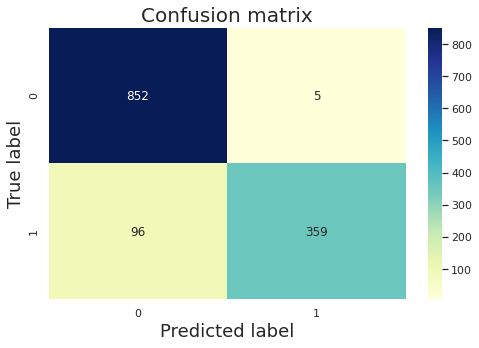

In [8]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df0 = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df0['Actual'],df0['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [9]:
def confusion_matrix_all(data_train,threshold):

    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
    pred = p1['category'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values

    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
        if score[23]=='Normal':
            prob = 1 - score[24]
            proplist.append(prob)
        else:
            prob = score[24]
            proplist.append(prob)


    prob_all =np.array(proplist)

#2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------
    
    import numpy as np
    from sklearn.metrics import confusion_matrix

    TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
    print(TN, FP, FN, TP)

# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')
    return tn, fp, fn, tp

In [10]:
#Test function
data_train =p1
threshold = 0.5
confusion_matrix_all(data_train,threshold)

852 5 96 359
(TN,FP,FN,TP)
( 851 , 6 , 97 , 358 )


(851, 6, 97, 358)

In [11]:
import numpy as np
threshold = np.arange(0.0, 1.002, 0.0001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

852 5 96 359
(TN,FP,FN,TP)
( 0 , 857 , 0 , 455 )
852 5 96 359
(TN,FP,FN,TP)
( 829 , 28 , 40 , 415 )
852 5 96 359
(TN,FP,FN,TP)
( 833 , 24 , 45 , 410 )
852 5 96 359
(TN,FP,FN,TP)
( 836 , 21 , 45 , 410 )
852 5 96 359
(TN,FP,FN,TP)
( 838 , 19 , 45 , 410 )
852 5 96 359
(TN,FP,FN,TP)
( 839 , 18 , 47 , 408 )
852 5 96 359
(TN,FP,FN,TP)
( 839 , 18 , 49 , 406 )
852 5 96 359
(TN,FP,FN,TP)
( 839 , 18 , 49 , 406 )
852 5 96 359
(TN,FP,FN,TP)
( 839 , 18 , 49 , 406 )


KeyboardInterrupt: 

In [16]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [17]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

No handles with labels found to put in legend.


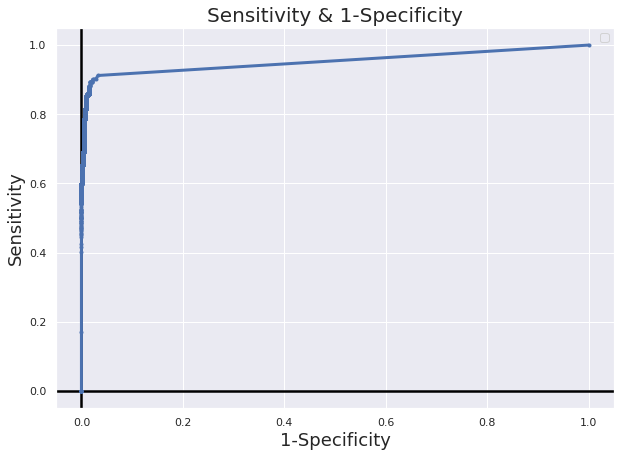

PR AUC (area = 0.95)


In [18]:
#sen VS spec
import numpy as np
import matplotlib.pyplot as plt
sen= np.array(roc0['tpr'])
spec = np.array(roc0['1-Spec'])
# from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
plt.plot([0, 0],[1, 1],'c', linestyle='--',lw=2.5)
plt.plot(spec,sen,'b', marker='.',lw=lw)  
    # axis labels
plt.xlabel('1-Specificity',fontsize=18)
plt.ylabel('Sensitivity',fontsize=18)
plt.title('Sensitivity & 1-Specificity',fontsize=20)
    # show the legend
plt.legend()
    # show the plot
plt.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(spec, sen)
print('PR AUC (area = %0.2f)' % (auc_score))

No handles with labels found to put in legend.


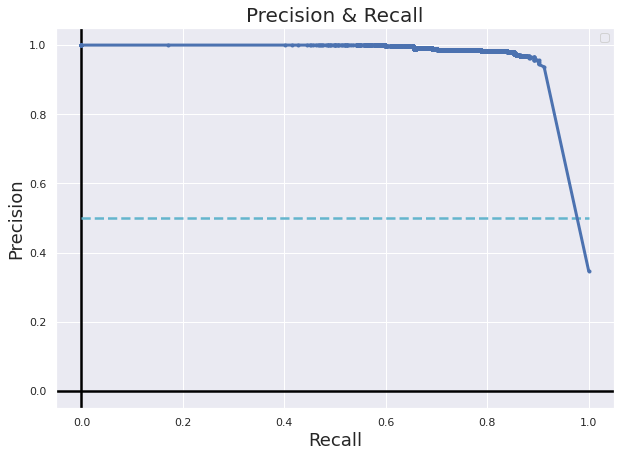

PR AUC (area = 0.96)


In [19]:
#Precision & Recall Curve
import numpy as np
recall = np.array(roc0['Recall'])
precision = np.array(roc0['Precision'])

import matplotlib.pyplot as plt
from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
fig.patch.set_facecolor('w')
plt.plot([0, 1], [0.5, 0.5],'c', linestyle='--',lw=2.5)
pyplot.plot(recall, precision,'b', marker='.', lw=lw)
    # axis labels
pyplot.xlabel('Recall',fontsize=18)
pyplot.ylabel('Precision',fontsize=18)
pyplot.title('Precision & Recall',fontsize=20)
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('PR AUC (area = %0.2f)' % (auc_score))

In [23]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
0,0.0,0.346799,1.0,1.0,1.0,1.0,0.346799,0,857,0,455


In [ ]:
# #Select the best threshold
# FP_min = roc0[roc0.FP == roc0.FP.min()]
# FN_min = FN_min[FP_min.FN == FP_min.FN.min()]
# FN_min

In [12]:
import numpy as np
# threshold = np.arange(0.0, 1.002, 0.001)
threshold = np.arange(0.002, 0.008, 0.00001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 54 , 401 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 54 , 401 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 54 , 401 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 54 , 401 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 55 , 400 )
852 5 96 359
(TN,FP,FN,TP)
( 84

852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 58 , 397 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 58 , 397 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 59 , 396 )
852 5 96 359
(TN,FP,FN,TP)
( 84

852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 61 , 394 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 84

852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 62 , 393 )
852 5 96 359
(TN,FP,FN,TP)
( 84

In [13]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)  

In [14]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

In [15]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
0,0.00200,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401
1,0.00201,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401
2,0.00202,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401
3,0.00203,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401


In [17]:
#Select the best threshold
FN_min = roc0[roc0.FN != 0]
FN_min_ = FN_min[FN_min.FN == FN_min.FN.min()]
# FN_min = roc0[roc0.FN == roc0.FN.min()]
FN_min__ = FN_min_[FN_min_.FP == FN_min_.FP.min()]
FN_min__

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
0,0.00200,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401
1,0.00201,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401
2,0.00202,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401
3,0.00203,0.968599,0.881319,0.881319,0.015169,0.015169,0.948933,844,13,54,401


In [19]:
threshold = FN_min__['Threshold'].tolist()[0]
threshold

0.002

In [20]:

    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
    pred = p1['category'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values

    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
        if score[23]=='Normal':
            prob = 1 - score[24]
            proplist.append(prob)
        else:
            prob = score[24]
            proplist.append(prob)


    prob_all =np.array(proplist)

#2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------
    
    import numpy as np
    from sklearn.metrics import confusion_matrix

    TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
    print(TN, FP, FN, TP)

# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')


852 5 96 359
(TN,FP,FN,TP)
( 844 , 13 , 54 , 401 )


In [22]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, alist))#performance

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       857
           1       0.97      0.88      0.92       455

    accuracy                           0.95      1312
   macro avg       0.95      0.93      0.94      1312
weighted avg       0.95      0.95      0.95      1312

